# Introdução à Ciência de Dados - UFPB
Professor: Yuri Malheiros

Integrantes:

    ### Douglas Lima 2016003123
    ### Thomas Ribeiro 20180039733


## Python 

# Análise de casos de covid no Brasil e no Mundo

### Introdução:

####  Motivações:

    * Devido ao atual cenário brasileiro e mundial a respeito da covid-19 é de grande importância para o mundo saber dos riscos de contaminação,mortes e casos de acordo com a população brasileira e mundial para o caso pandêmias futuras.

    * Análisar a taxa de mortalidade nos estados brasileiros afetados pela pandemia

    * Promover um estudo para o melhor entendimento da covid19 no brasil e no mundo

    * Análisar um possível aumento de casos em determinados estados brasileiros


#### Objetivos da análise:

Demonstrar a situação brasileira e mundial em relação ao covid-19 em diferentes aspectos e também tentando descobrir características da pandemia que possam ajudar a comunidade científica. 


In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.stats import linregress

#### Dados usados e exploração inicial:

covid_19_data.csv -> neste dataset carregamos os dados que dizem respeito dos casos confirmados, mortes e recuperados em atualização diária em todo o mundo, entretanto, essa base possui dados apenas entre as datas do mês 3 até o mês 9 de 2020.

In [86]:
covid19_data = pd.read_csv("datasets/CoronaDataset/covid_19_data.csv")
covid19_data.head(3)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0


brazil_covid2019_cities.csv -> neste dataset carregamos os dados que informam o número de casos e mortes por estados, que foi usado para análisar a situação da covid no Brasil através de gráficos e métodos de analise preditiva.

In [87]:
covid19_data_br = pd.read_csv("datasets/CoronaBrazil/brazil_covid19_cities.csv")
covid19_data_br.head(3)


,date,state,name,code,cases,deaths
0,2020-03-27,AC,Acrelândia,120001.0,0,0
1,2020-03-27,AC,Assis Brasil,120005.0,0,0
2,2020-03-27,AC,Brasiléia,120010.0,0,0


brazil_population_2019.csv -> neste dataset carregamos os dados que informam dados referentes aos estados e regiões brasileiras como a quantidade populacional do Brasil, que foi usada para cruzar informações com outros datasets no que diz respeito aos números de casos por estados.

In [88]:
br_population = pd.read_csv("datasets/CoronaBrazil/brazil_population_2019.csv")
br_population.head(3)

,region,state,city,state_code,city_code,health_region_code,health_region,population
0,Centro-Oeste,Mato Grosso do Sul,Alcinópolis,50,500025,50001,Campo Grande,5343
1,Centro-Oeste,Mato Grosso do Sul,Amambai,50,500060,50003,Dourados,39396
2,Centro-Oeste,Mato Grosso do Sul,Bataguassu,50,500190,50004,Três Lagoas,23024


### Exploração dos dados e pré-processamento

Inicialmente realizamos a exploração apenas na coluna de casos recuperados, pois esses se diferenciava de todas as outras colunas, já  que nele temos a atualizaço diária, ao invés do dado acumulado, que visualizamos olhando os datasets.

Demais analises e seu respectivo pré-processamento se encontram no processo realizado para a resolução das perguntas que foram levantadas

Contando repetições de valores na coluna Recovered

In [89]:
covid19_data['Recovered'].value_counts()

0.0         25990
1.0          1644
2.0           794
18.0          619
13.0          568
            ...  
9447.0          1
22807.0         1
8323.0          1
91227.0         1
179941.0        1
Name: Recovered, Length: 21568, dtype: int64

<AxesSubplot:>

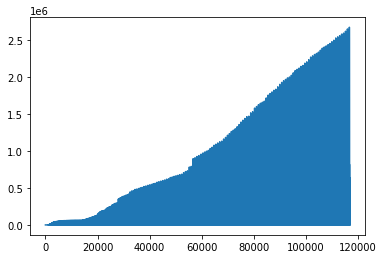

In [90]:
covid19_data.Recovered.plot()

## Global

Estudo da situação covid no âmbito global

## Pergunta
 1. Quais países demonstraram maior taxa de transmissão?

In [91]:
paises_top5_confirmados = list(covid19_data.groupby(["Country/Region"]).max(["Confirmed"]).sort_values(by="Confirmed", ascending=False).head(5).index)
paises_top5_confirmados

['India', 'Brazil', 'US', 'South Africa', 'Argentina']

India
Média: 43237.82875686471
Mediana: 5987.0
Desvio padrão: 96002.9934231419



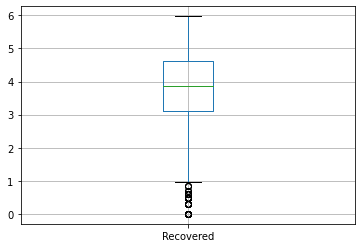

Brazil
Média: 65130.45768468724
Mediana: 37034.0
Desvio padrão: 92078.32052127658



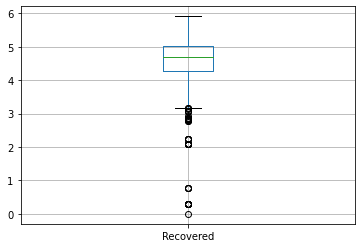

US
Média: 14156.003156361281
Mediana: 0.0
Desvio padrão: 153751.99411840737



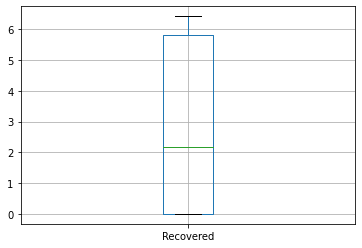

South Africa
Média: 169893.6551724138
Mediana: 38531.0
Desvio padrão: 217562.06729330204



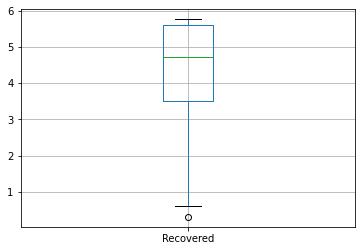

Argentina
Média: 85258.75609756098
Mediana: 9083.0
Desvio padrão: 138334.71252933826



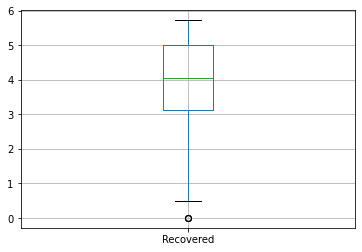

In [92]:
for pais in paises_top5_confirmados:
    print(pais)
    covid19_data_pais = covid19_data.loc[covid19_data['Country/Region'] == pais]
    
    print("Média:", np.mean(covid19_data_pais["Recovered"]))
    print("Mediana:", np.nanmedian(covid19_data_pais["Recovered"]))
    print("Desvio padrão:", np.std(covid19_data_pais["Recovered"]), end = "\n\n")
    covid19_data_pais=covid19_data_pais.query('Recovered!=0')
    covid19_data_pais["Recovered"] = covid19_data_pais["Recovered"].apply(math.log10)
    #math.log(14,5)
    
    plt.show(covid19_data_pais.boxplot(column=["Recovered"]))

## Pergunta
 2. Qual o país que tem o maior número de recuperação de pessoas infectadas?

In [93]:
paises_top5_recuperados = list(covid19_data.groupby(["Country/Region"]).sum().sort_values(by="Recovered", ascending=False).head(5).index)
paises_top5_recuperados

['Brazil', 'US', 'India', 'Russia', 'Mexico']

## Pergunta
 3. Países com o maior número de mortes?

In [94]:
paises_top5_mortos = list(covid19_data.groupby(["Country/Region"]).max(["Deaths"]).sort_values(by="Deaths", ascending=False).head(5).index)
paises_top5_mortos

['UK', 'Brazil', 'India', 'US', 'France']

## Brasil

Estudo da situação covid no âmbito brasileiro

### Dados que serão utilizados

In [95]:

dic_sigla_estado = {
"AC" : "Acre", "AL" : "Alagoas", "AP" : "Amapá", "AM" : "Amazonas", "BA" : "Bahia", "CE" : "Ceará", "ES" : "Espírito Santo", "GO" : "Goiás", "MA" : "Maranhão", "MT" : "Mato Grosso", "MS" : "Mato Grosso do Sul", "MG" : "Minas Gerais", "PA" : "Pará", "PB" : "Paraíba", "PR" : "Paraná", "PE" : "Pernambuco", "PI" : "Piauí", "RJ" : "Rio de Janeiro", "RN" : "Rio Grande do Norte", "RS" : "Rio Grande do Sul", "RO" : "Rondônia", "RR" : "Roraima", "SC" : "Santa Catarina", "SP" : "São Paulo", "SE" : "Sergipe", "TO" : "Tocantins", "DF" : "Distrito Federal"
}
dic_estado_sigla = dict([(value, key) for key, value in dic_sigla_estado.items()]) 

### Somando as ocorrências por estado

In [96]:
#Normalização de sigla para nome
def transform_sigla_name(sigla):
    return dic_sigla_estado[sigla]

covid19_data_br["state"] = covid19_data_br["state"].apply(transform_sigla_name)
covid19_data_br

,date,state,name,code,cases,deaths
0,2020-03-27,Acre,Acrelândia,120001.0,0,0
1,2020-03-27,Acre,Assis Brasil,120005.0,0,0
2,2020-03-27,Acre,Brasiléia,120010.0,0,0
3,2020-03-27,Acre,Bujari,120013.0,0,0
4,2020-03-27,Acre,Capixaba,120017.0,0,0
...,...,...,...,...,...,...
1236535,2020-11-03,Tocantins,Tocantinópolis,172120.0,929,21
1236536,2020-11-03,Tocantins,Tupirama,172125.0,97,2
1236537,2020-11-03,Tocantins,Tupiratins,172130.0,18,0
1236538,2020-11-03,Tocantins,Wanderlândia,172208.0,339,5


## Pergunta

 4. Estados brasileiros mais afetados com a covid-19, de acordo com a quantidade populacional?

<AxesSubplot:xlabel='cases', ylabel='state'>

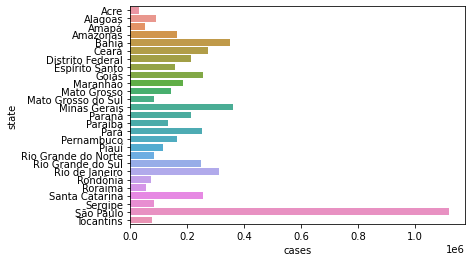

In [97]:

valores_maximos = covid19_data_br.groupby(["state","name"]).max()
casos_estados = valores_maximos.groupby(["state"])["cases"].sum().reset_index()
sns.barplot(data=casos_estados,x="cases",y="state")


In [98]:
populacao_estado = br_population.groupby(["state"])["population"].sum().reset_index()
populacao_estado.index = populacao_estado["state"]
populacao_estado = populacao_estado.drop(["state"], axis=1)


casos_estados.index = casos_estados["state"]
casos_estados = casos_estados.drop(["state"], axis=1)
casos_estados["population"]=populacao_estado["population"]
casos_estados.reset_index()

,state,cases,population
0,Acre,30964,814380
1,Alagoas,91032,2897092
2,Amapá,52832,845731
3,Amazonas,162560,4056806
4,Bahia,349781,10755879
5,Ceará,271507,9040536
6,Distrito Federal,214202,3015268
7,Espírito Santo,156317,3841551
8,Goiás,257048,5621030
9,Maranhão,186219,6373338


<AxesSubplot:xlabel='cases', ylabel='population'>

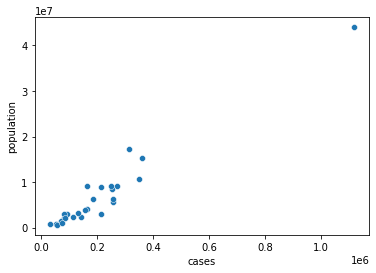

In [99]:
sns.scatterplot(data=casos_estados, x="cases",y="population")

In [100]:
casos_estados_kmeans = casos_estados[["cases","population"]]
kmeans = KMeans(n_clusters=4).fit(casos_estados_kmeans)

<AxesSubplot:xlabel='cases', ylabel='population'>

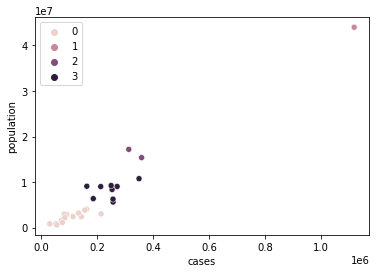

In [101]:
sns.scatterplot( data=casos_estados_kmeans, x="cases", y="population", hue=kmeans.labels_)

### Visualização da evolução de casos em São Paulo
Como São Paulo é o estado mais afetado pelo covid é interessante vermos a sua linha de progressão no numero de casos

 ## Pergunta
 5. Evolução diária do número de casos no estado brasileiro mais afetado (São Paulo)?

<AxesSubplot:xlabel='dias', ylabel='cases'>

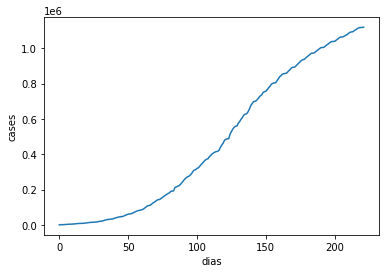

In [102]:
covid19_saopaulo = covid19_data_br.loc[covid19_data_br["state"] == "São Paulo"]
covid19_saopaulo = covid19_saopaulo.groupby(["date"])["cases"].sum().reset_index()
covid19_saopaulo["dias"] = covid19_saopaulo.index
sns.lineplot(data=covid19_saopaulo, x="dias", y="cases")

<AxesSubplot:>

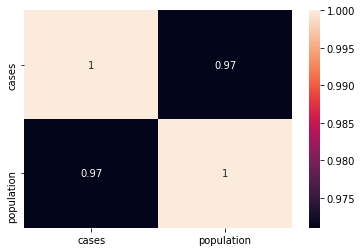

In [103]:
sns.heatmap(casos_estados.corr(), annot=True)

## Análise de mortos com casos confirmados

<AxesSubplot:xlabel='Deaths', ylabel='Confirmed'>

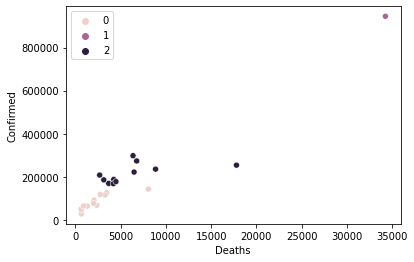

In [104]:
valores_maximos = covid19_data.groupby(["Province/State"]).max()
dataCovidBrGroup =valores_maximos.query('`Country/Region`=="Brazil"')[["Deaths","Confirmed"]]

kmeans = KMeans(n_clusters=3).fit(dataCovidBrGroup)
sns.scatterplot( data=dataCovidBrGroup, x="Deaths", y="Confirmed", hue=kmeans.labels_)


## Regressão linear

é possivel prever o numero de mortes de acordo com a quantidade de casos ??? SIm o douglas te responde

In [105]:

def gen_line(x_min, x_max, n_points, a, b):
    interval = x_max-x_min
    interval_value = interval/n_points
    
    x_result = []
    y_result = []

    for i in range(n_points):
        current_x = x_min+i*interval_value
        x_result.append(current_x)
        y_result.append(a*current_x + b)
        
    return x_result, y_result

def show_regression(x, y, a, b):
    N = 100

    plt.scatter(x, y)

    line_1 = gen_line(min(x), max(x), N, a, b)
    plt.plot(line_1[0], line_1[1], c= "red")

    plt.gca()
    plt.show()

In [106]:
ds_regress = covid19_data_br[["cases","deaths"]]
result = linregress(ds_regress['cases'],ds_regress['deaths'])
a=result.slope
b=result.intercept
print(result.slope)
print(result.intercept)

0.041924579189616715
-3.687554293625478


In [107]:
show_regression(ds_regress['cases'],ds_regress['deaths'], a, b)

KeyboardInterrupt: 